# K-means Clustering
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

# Model objective
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [5]:
# importing necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

In [7]:
# loading the data
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Finding the optimum number of clusters for k-means clustering.

In [10]:
X = data.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans

# wcss ( within cluster sum of squares)
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10,
                  random_state = 0)
  km.fit(X)
  wcss.append(km.inertia_)

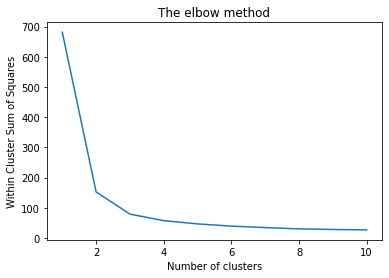

In [11]:
# plotting the results on a line graph 
# Analyse an elbow from the graph

plt.plot(range(1,11), wcss )
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('The elbow method')
plt.show();

From the above graph we can easily identify an elbow formed, the position for optimum clusters' formation.This is when wcss does not decrease significantly with each iteration.

Hence we conclude number of clusters, k = 3 

In [14]:
# applying kmeans to dataset or
# creating kmeans classifier
km = KMeans(n_clusters=3, init = 'k-means++',
            n_init = 10, max_iter = 300,
            random_state = 0)
mymodel = km.fit(X)
y_means = mymodel.predict(X)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

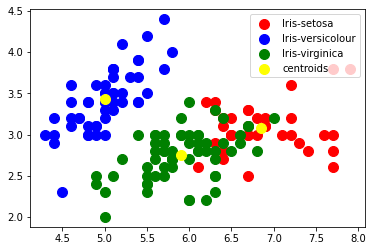

In [24]:
# visualising the clusters
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1],
           s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1],
           s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# plotting cluster centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'centroids')

plt.legend(loc = 'upper right');

Thus I have successfully distributed the given dataset into clusters and also represented them visually.